# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "f956df277a83558a768d1d55d1173e35496654b6"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool


In [ ]:
! wget -O aroon_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/aroon_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' aroon_crossover.py

In [5]:
from aroon_crossover import AroonCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130145,
 'strategyId': 'e374053d59ce4579a48b03e1abf2a269'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('AAPL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AAPL'

## Setup Parameters

In [9]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKFWEIK28TM4F3NNEYHR', 
        'CLIENT_API_SECRET': '2RaicNUeV8BWIT8qd3S8wOAqMFLwoRESuM37d5tD'
    }
}

In [10]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [11]:
parameters = {
  'TIME_PERIOD': 12
}

In [12]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

### Start

In [14]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    vendor_details=vendor_details,
    initial_funds_virtual=initial_virtual_funds
    
)


Starting the strategy 'Aroon Crossover US' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Vendor Name             │ ALPACAV2                  │
├─────────────────────────┼───────────────────────────┤
│ Strategy Name           │ Aroon Crossover US        │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:AAPL']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼──────────

### Status

In [15]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [16]:
logs = connection.get_backtesting_logs(strategy)

In [17]:
print(logs)

[2023-08-22 16:51:21] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 16:51:22] Sanity checks on cfg successful.
[2023-08-22 16:51:22] Currency set to "USD"
[2023-08-22 16:51:22] Setting up broker connection...
[2023-08-22 16:51:24] Broker connection has been setup successfully.
[2023-08-22 16:51:24] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '4000.00'
[2023-08-22 16:51:24] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 16:51:24] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 16:51:24] Reading strategy...
[2023-08-22 16:51:24] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   

### Stop

In [18]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [19]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,pnl_absolute,pnl_cumulative_absolute
0,NASDAQ,AAPL,2021-08-03 11:30:00-04:00,SELL,5,$,145.80,2021-08-03 12:30:00-04:00,BUY,5,$,147.01,-6.05,-6.05
1,NASDAQ,AAPL,2021-08-03 12:30:00-04:00,BUY,5,$,147.01,2021-08-03 13:30:00-04:00,SELL,5,$,147.01,0.00,-6.05
2,NASDAQ,AAPL,2021-08-03 13:30:00-04:00,BUY,5,$,147.01,2021-08-03 14:30:00-04:00,SELL,5,$,147.01,0.00,-6.05
3,NASDAQ,AAPL,2021-08-03 14:30:00-04:00,BUY,5,$,147.01,2021-08-03 15:30:00-04:00,SELL,5,$,147.01,0.00,-6.05
4,NASDAQ,AAPL,2021-08-06 09:30:00-04:00,SELL,5,$,146.32,2021-08-06 15:30:00-04:00,BUY,5,$,146.29,0.15,-5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,NASDAQ,AAPL,2023-07-21 10:30:00-04:00,SELL,5,$,192.86,2023-07-21 15:30:00-04:00,BUY,5,$,193.10,-1.20,23.00
175,NASDAQ,AAPL,2023-07-25 09:30:00-04:00,BUY,5,$,193.39,2023-07-25 15:30:00-04:00,SELL,5,$,193.76,1.85,24.85
176,NASDAQ,AAPL,2023-07-26 09:30:00-04:00,BUY,5,$,193.71,2023-07-26 15:30:00-04:00,SELL,5,$,194.78,5.35,30.20
177,NASDAQ,AAPL,2023-07-28 09:30:00-04:00,SELL,5,$,194.70,2023-07-28 15:30:00-04:00,BUY,5,$,196.51,-9.05,21.15


## Statistics Reports

### Statistics

In [20]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-03
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      94.0%

Cumulative Return   0.69%
CAGR﹪              0.35%

Sharpe              0.47
Prob. Sharpe Ratio  65.56%
Sortino             0.73
Sortino/√2          0.52
Omega               1.09

Max Drawdown        -1.28%
Longest DD Days     314

Gain/Pain Ratio     0.1
Gain/Pain (1M)      0.21

Payoff Ratio        1.12
Profit Factor       1.09
Common Sense Ratio  1.3
CPC Index           0.6
Tail Ratio          1.19
Outlier Win Ratio   5.02
Outlier Loss Ratio  3.29

MTD                 -0.18%
3M                  0.3%
6M                  0.02%
YTD                 -0.12%
1Y                  0.68%
3Y (ann.)           0.35%
5Y (ann.)           0.35%
10Y (ann.)          0.35%
All-time (ann.)     0.35%

Avg. Drawdown       -0.5%
Avg. Drawdown Days  96
Recovery Factor     0.54
Ulcer Index         0.0
Serenity Index      0.22


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-03
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             94.0%

Cumulative Return          0.69%
CAGR﹪                     0.35%

Sharpe                     0.47
Prob. Sharpe Ratio         65.56%
Smart Sharpe               0.44
Sortino                    0.73
Smart Sortino              0.69
Sortino/√2                 0.52
Smart Sortino/√2           0.48
Omega                      1.09

Max Drawdown               -1.28%
Longest DD Days            314
Volatility (ann.)          2.1%
Calmar                     0.27
Skew                       0.55
Kurtosis                   4.98

Expected Daily %           0.0%
Expected Monthly %         0.03%
Expected Yearly %          0.23%
Kelly Criterion            4.22%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.21%
Expected Shortfall (cVaR)  -0.21%

Max Consecutive Wins       5
Max 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-07-13,2022-10-21,2022-12-21,161,-1.277402,-1.217582
2,2021-09-01,2021-09-10,2022-07-12,314,-0.835245,-0.706842
3,2023-01-03,2023-02-23,2023-05-09,125,-0.712796,-0.668091
4,2023-06-07,2023-07-28,2023-07-31,53,-0.494909,-0.483773
5,2021-08-16,2021-08-20,2021-08-30,13,-0.128860,-0.082570


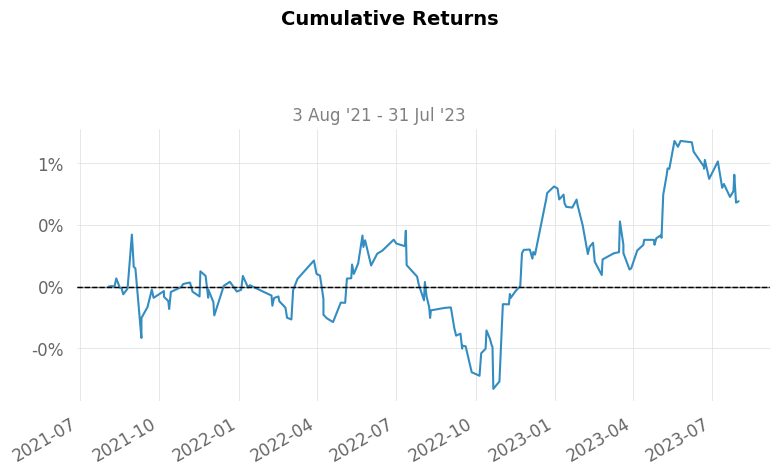

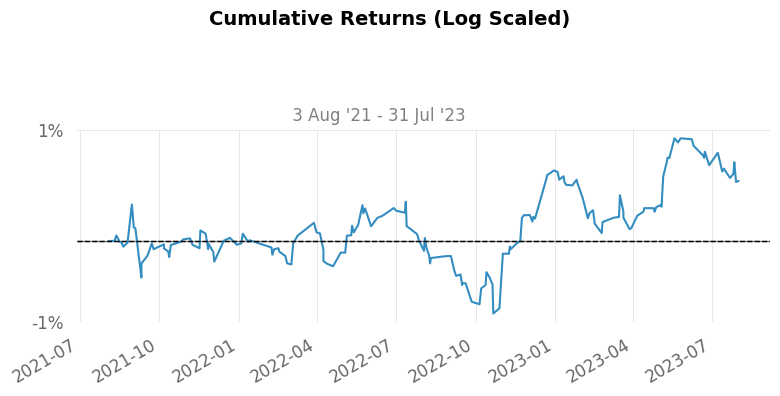

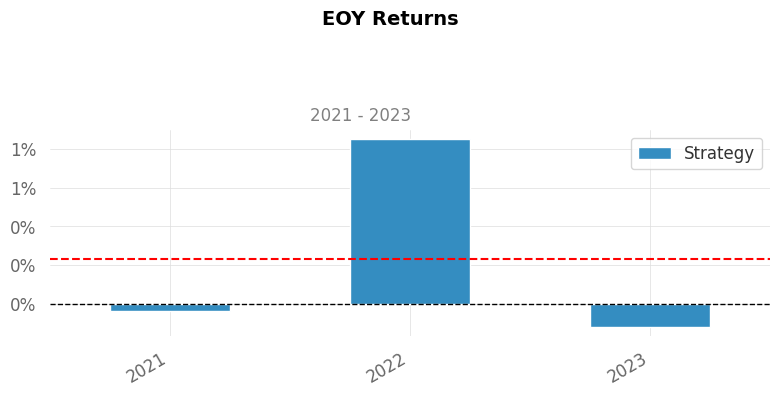

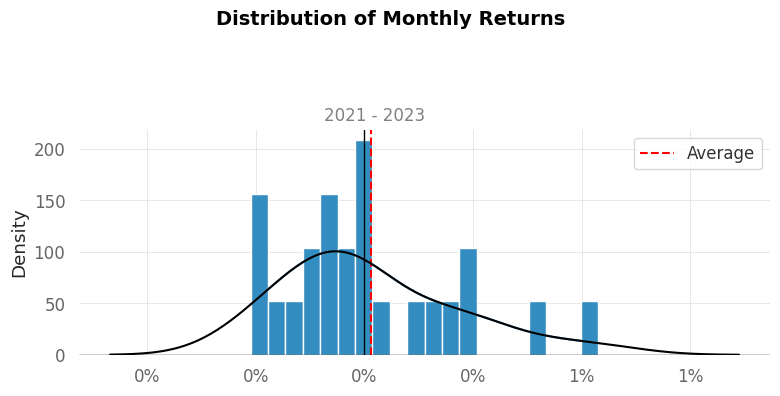

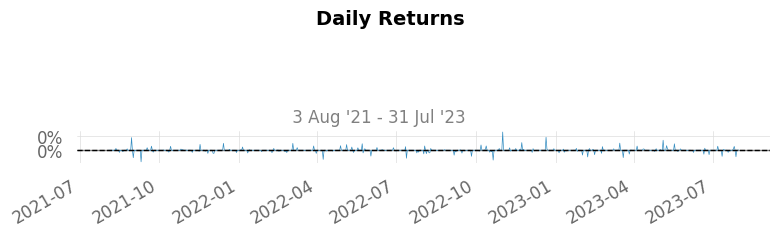

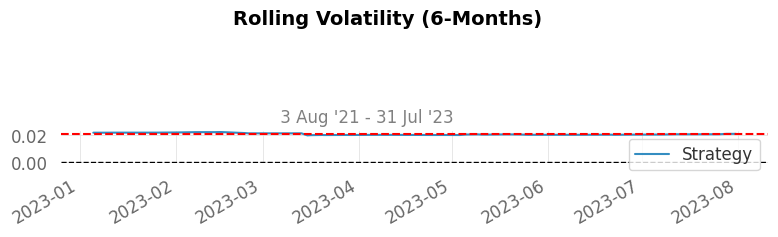

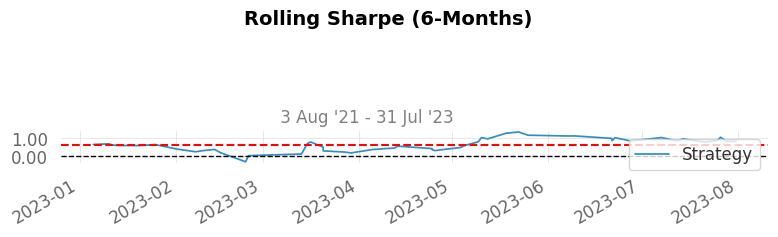

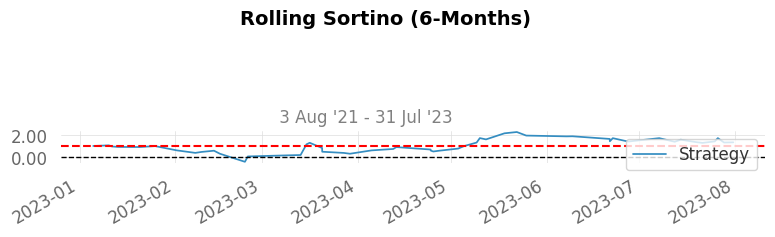

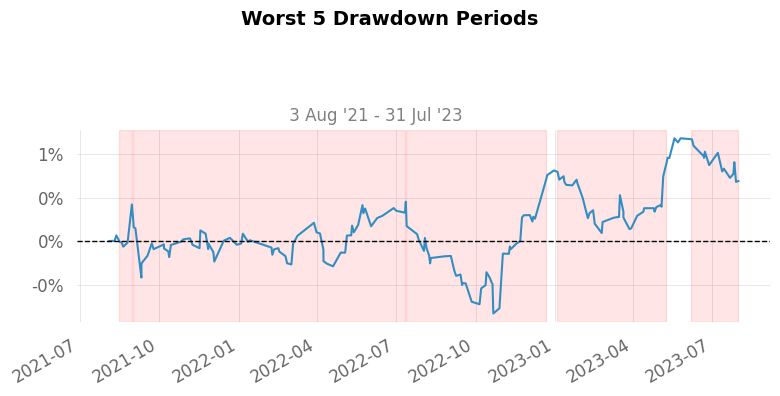

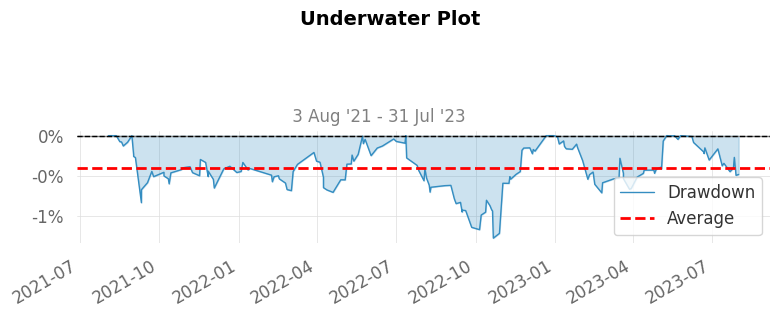

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


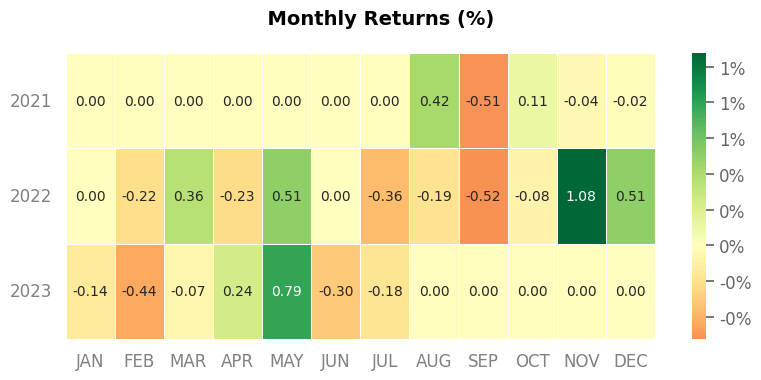

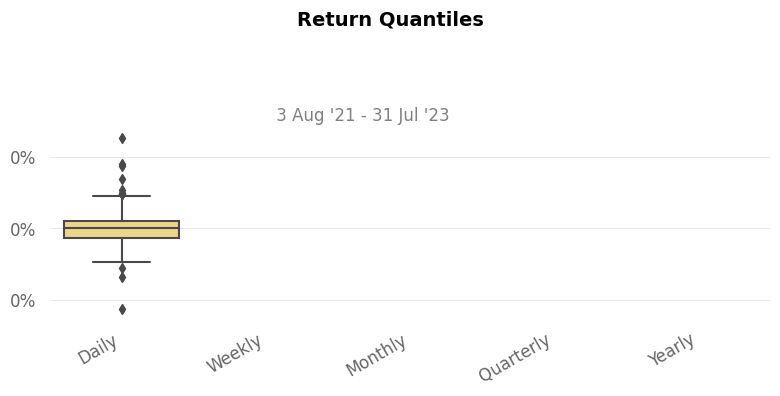

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [21]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True, initial_funds=initial_virtual_funds)

## Order History

In [22]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:AAPL | 2021-08-03 11:30:00-04:00 | 48f9630c00e2473b8614eead5a9e925d | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2021-08-03 11:30:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-03 11:30:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2021-08-03 11:30:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2021-08-03 11:30:00.500000-04:00 | OPEN                   |       |
|  4 | 2021-08-03 11:30:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [23]:
connection.realtrade(
    strategy=strategy, 
    start='9:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:AAPL', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_id=73,
    broking_details=broking_details
)


Starting the strategy 'Aroon Crossover US' in REALTRADING mode...
╒═════════════════╤═══════════════════════════╕
│ Config          │ Value                     │
╞═════════════════╪═══════════════════════════╡
│ Vendor Name     │ ALPACAV2                  │
├─────────────────┼───────────────────────────┤
│ Broker Name     │ ALPACAV2                  │
├─────────────────┼───────────────────────────┤
│ Strategy Name   │ Aroon Crossover US        │
├─────────────────┼───────────────────────────┤
│ Trading Type    │ REALTRADING               │
├─────────────────┼───────────────────────────┤
│ Instrument(s)   │ ['NASDAQ:AAPL']           │
├─────────────────┼───────────────────────────┤
│ Quantity/Lots   │ 5                         │
├─────────────────┼───────────────────────────┤
│ Start Timestamp │ 2023-08-22 09:00:00-04:00 │
├─────────────────┼───────────────────────────┤
│ End Timestamp   │ 2023-08-22 15:00:00-04:00 │
├─────────────────┼───────────────────────────┤
│ Parameters      │ {

### Status

In [24]:
connection.get_realtrading_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [25]:
logs = connection.get_realtrading_logs(strategy, display_logs_in_auto_update_mode=False)
print(logs)

[2023-08-22 20:12:44] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:12:44] Sanity checks on cfg successful.
[2023-08-22 20:12:44] Currency set to "USD"
[2023-08-22 20:12:44] Setting up broker connection...
[2023-08-22 20:12:47] Fetching broker specific (ALPACAV2) fresh instruments data...
[2023-08-22 20:12:54] Broker connection has been setup successfully.
[2023-08-22 20:12:54] (NASDAQ_EQ) Funds available in client's ALPACAV2 account is : USD '3840483.76'
[2023-08-22 20:12:54] [QUERYING] Sanity check: Ensuring all instruments are affordable...
[2023-08-22 20:12:54] [PASSED] Sanity check: All instruments are affordable
[2023-08-22 20:12:54] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:12:55] Welcome PA327K1V17PK!
[2023-08-22 20:12:55] Reading strategy...
[2023-08-22 20:12:56] Entering Realtrading mode. Henceforth, all timestamps will

### Stop

In [26]:
connection.stop_realtrading_job(strategy)

Stopping REALTRADING job... Success.


### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)